# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_price_fetch = requests.get(btc_url)
btc_price_fetch

<Response [200]>

In [6]:
#Load BTC price data into python dictionary using json.loads
btc_price_data = json.loads(btc_price_fetch.content.decode('utf-8'))
btc_price_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19173856,
   'total_supply': 19173856,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 19367.37,
     'volume_24h': 13089465663,
     'market_cap': 371917292286,
     'percentage_change_1h': -0.0815407793767357,
     'percentage_change_24h': -0.652198855989685,
     'percentage_change_7d': 0.273912456156975,
     'percent_change_1h': -0.0815407793767357,
     'percent_change_24h': -0.652198855989685,
     'percent_change_7d': 0.273912456156975}},
   'last_updated': 1665288839}},
 'metadata': {'timestamp': 1665288839,
  'num_cryptocurrencies': 3116,
  'error': None}}

In [7]:
btc_current_price = btc_price_data['data']['1']['quotes']['USD']['price']
btc_current_price

19367.37

In [8]:
# Fetch current ETH price
eth_price_fetch = requests.get(eth_url)
eth_price_fetch

<Response [200]>

In [9]:
#Load ETH price data into python dictionary using json.loads
eth_price_data = json.loads(eth_price_fetch.content.decode('utf-8'))
eth_price_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120873089,
   'total_supply': 120873089,
   'max_supply': 120873089,
   'quotes': {'USD': {'price': 1311.22,
     'volume_24h': 4922924289,
     'market_cap': 158667074566,
     'percentage_change_1h': 0.0697605402429446,
     'percentage_change_24h': -1.34229389340427,
     'percentage_change_7d': -0.0036523121931092,
     'percent_change_1h': 0.0697605402429446,
     'percent_change_24h': -1.34229389340427,
     'percent_change_7d': -0.0036523121931092}},
   'last_updated': 1665288856}},
 'metadata': {'timestamp': 1665288856,
  'num_cryptocurrencies': 3116,
  'error': None}}

In [10]:
eth_current_price = eth_price_data['data']['1027']['quotes']['USD']['price']
eth_current_price

1311.22

In [11]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_current_price
my_eth_value = my_eth * eth_current_price
my_btc_value, my_eth_value

(23240.843999999997, 6949.466)

In [12]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")

The current value of your 1.2 BTC is $23,240.84
The current value of your 5.3 ETH is $6,949.47


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [15]:
# Create the Alpaca API object
alpaca_api = tradeapi.REST( alpaca_api_key,
                            alpaca_secret_key,
                            api_version = 'v2')

In [16]:
# Format current date as ISO format
current_date = pd.Timestamp('2022-10-07', tz = "America/New_York").isoformat()
current_date

'2022-10-07T00:00:00-04:00'

In [17]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [18]:
# Get current closing prices for SPY and AGG
df_stock_current = alpaca_api.get_bars(  tickers,
                                         timeframe,
                                         start = current_date,
                                         end = current_date).df
df_stock_current

open      high     low   close     volume  \
timestamp                                                                
2022-10-07 04:00:00+00:00   95.81   96.0100   95.68   95.77    6149309   
2022-10-07 04:00:00+00:00  369.06  373.2933  360.94  362.79  107239188   

                           trade_count        vwap symbol  
timestamp                                                  
2022-10-07 04:00:00+00:00        18717   95.836813    AGG  
2022-10-07 04:00:00+00:00       665841  365.065822    SPY

In [19]:
# Reorganize the DataFrame
# Separate ticker data
df_agg_current = df_stock_current[df_stock_current["symbol"] == "AGG"].drop("symbol", axis = 1)
df_spy_current = df_stock_current[df_stock_current["symbol"] == "SPY"].drop("symbol", axis = 1)

In [20]:
# Concatenate the ticker DataFrames
df_stock_current = pd.concat([df_agg_current, df_spy_current], axis = 1, keys=["AGG","SPY"])

In [21]:
# Preview DataFrame
df_stock_current

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2022-10-07 04:00:00+00:00  95.81  96.01  95.68  95.77  6149309       18717   

                                         SPY                            \
                                vwap    open      high     low   close   
timestamp                                                                
2022-10-07 04:00:00+00:00  95.836813  369.06  373.2933  360.94  362.79   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2022-10-07 04:00:00+00:00  107239188      665841  365.065822

In [22]:
# Pick AGG and SPY close prices
agg_close_price = df_stock_current["AGG"]["close"].iloc[0]
spy_close_price = df_stock_current["SPY"]["close"].iloc[0]

In [23]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.77
Current SPY closing price: $362.79


In [24]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

In [25]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")

The current value of your 50 SPY shares is $18,139.50
The current value of your 200 AGG shares is $19,154.00


### Savings Health Analysis

In [26]:
# Set monthly household income
monthly_income = 12000

In [27]:
# Consolidate financial assets data
total_crypto_value = my_btc_value + my_eth_value
total_share_value = my_agg_value + my_spy_value
total_crypto_value , total_share_value

(30190.309999999998, 37293.5)

In [28]:
# Create savings DataFrame
df_savings = pd.DataFrame([total_crypto_value, total_share_value], index=["crypto", "shares"], columns = ["amount"])

In [29]:
# Display savings DataFrame
display(df_savings)

amount
crypto  30190.31
shares  37293.50

<AxesSubplot:title={'center':'Composition of personal savings'}, ylabel='amount'>

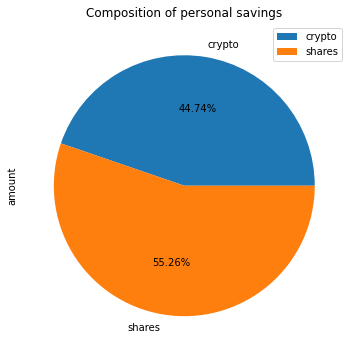

In [30]:
# Plot savings pie chart
df_savings.plot.pie( y="amount", autopct = '%1.2f%%', figsize = (6,6), title = "Composition of personal savings")

In [31]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

36000

In [32]:
# Calculate total amount of savings
total_savings = round(df_savings["amount"].sum(),2)
total_savings

67483.81

In [33]:
# Validate saving health
if total_savings == emergency_fund:
    print (f"Congratulation! Total savings are equal to emergency fund.\n" 
           f"You have reached your financial goal having the ideal emergency fund.")
elif total_savings > emergency_fund:
    print (f"Congratulation! Total savings are greater than the emergency fund. \n"
           f"You have enough money in your fund.")
else:
    gap =  emergency_fund - total_savings
    print (f"You are ${gap:,.2f} away from reaching your financial goal.")

Congratulation! Total savings are greater than the emergency fund. 
You have enough money in your fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [34]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-10-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-10-07', tz='America/New_York').isoformat()

In [35]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_historical = alpaca_api.get_bars( tickers,
                                           timeframe,
                                           start = start_date,
                                           end = end_date).df

In [36]:
df_stock_historical.head()

open    high       low   close   volume  \
timestamp                                                              
2017-10-09 04:00:00+00:00  109.35  109.43  109.3000  109.43  1131600   
2017-10-10 04:00:00+00:00  109.47  109.61  109.3999  109.44  1635802   
2017-10-11 04:00:00+00:00  109.47  109.53  109.4200  109.46  2048774   
2017-10-12 04:00:00+00:00  109.56  109.61  109.4800  109.59  1933369   
2017-10-13 04:00:00+00:00  109.82  109.87  109.6900  109.86  1743840   

                           trade_count        vwap symbol  
timestamp                                                  
2017-10-09 04:00:00+00:00         6721  109.380496    AGG  
2017-10-10 04:00:00+00:00         8934  109.488101    AGG  
2017-10-11 04:00:00+00:00         9184  109.479870    AGG  
2017-10-12 04:00:00+00:00         9814  109.543912    AGG  
2017-10-13 04:00:00+00:00         9223  109.799780    AGG

In [37]:
# Reorganize the DataFrame
# Separate ticker data
df_agg_historical=  df_stock_historical[df_stock_historical["symbol"] == "AGG"].drop("symbol", axis = 1)
df_spy_historical =  df_stock_historical[df_stock_historical["symbol"] == "SPY"].drop("symbol", axis = 1)

In [38]:
# Concatenate the ticker DataFrames
df_stock_data = pd.concat([df_agg_historical, df_spy_historical], axis = 1, keys=["AGG","SPY"])

In [39]:
#remove timestamp from index
df_stock_data.index = df_stock_data.index.date

In [40]:
# Display sample data
df_stock_data.head()

AGG                                                             \
              open    high       low   close   volume trade_count        vwap   
2017-10-09  109.35  109.43  109.3000  109.43  1131600        6721  109.380496   
2017-10-10  109.47  109.61  109.3999  109.44  1635802        8934  109.488101   
2017-10-11  109.47  109.53  109.4200  109.46  2048774        9184  109.479870   
2017-10-12  109.56  109.61  109.4800  109.59  1933369        9814  109.543912   
2017-10-13  109.82  109.87  109.6900  109.86  1743840        9223  109.799780   

               SPY                                                             
              open    high      low   close    volume trade_count        vwap  
2017-10-09  254.65  254.70  253.650  253.95  35803138      113893  254.099236  
2017-10-10  254.59  255.05  253.980  254.62  43057452      140616  254.400559  
2017-10-11  254.53  255.02  254.320  255.02  49118035      126972  254.772000  
2017-10-12  254.68  255.06  254.365  254.64  47070644      142560  254.735611  
2017-10-13  255.15  255.27  254.640  254.95  56197572      149417  254.982007

In [41]:
#drop unused columns
drop_columns = ["open","high","low","volume","trade_count", "vwap"]

for x in tickers:
    for y in drop_columns:
        df_stock_data.drop(columns = (x,y), inplace = True)

In [42]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# assume 252 trading days in a year. 30 years means 7560 trading days (30 x 252)
# set weight 40% bond AGG and 60% stock SPY
MC_Y30 = MCSimulation(portfolio_data = df_stock_data,
                      weights = [0.40, 0.60],
                      num_simulation = 500 ,
                      num_trading_days = 252*30
                      )

In [43]:
# Printing the simulation input data
MC_Y30.portfolio_data.head()

AGG                  SPY             
             close daily_return   close daily_return
2017-10-09  109.43          NaN  253.95          NaN
2017-10-10  109.44     0.000091  254.62     0.002638
2017-10-11  109.46     0.000183  255.02     0.001571
2017-10-12  109.59     0.001188  254.64    -0.001490
2017-10-13  109.86     0.002464  254.95     0.001217

In [44]:
MC_Y30.portfolio_data.describe()

AGG                       SPY             
             close daily_return        close daily_return
count  1259.000000  1258.000000  1259.000000  1258.000000
mean    110.838729    -0.000100   338.587903     0.000372
std       5.258128     0.003463    68.118034     0.013254
min      95.540000    -0.040010   222.950000    -0.109424
25%     106.470000    -0.001420   279.555000    -0.004465
50%     111.400000     0.000088   313.780000     0.000787
75%     115.060000     0.001416   400.825000     0.006696
max     119.630000     0.023721   477.710000     0.090603

In [45]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Y30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\twigi\FTBC\W5_Assignment\APIs-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2          3          4         5         6    \
0     1.000000  1.000000  1.000000   1.000000   1.000000  1.000000  1.000000   
1     1.004449  0.994764  0.999634   0.990582   1.004843  0.999391  1.009793   
2     1.005657  0.990282  0.996464   0.976603   1.004843  0.978522  1.007563   
3     1.012274  0.987565  0.991629   0.971023   1.000348  0.978524  1.002320   
4     1.001162  0.983380  0.989280   0.977306   0.998672  0.980476  1.006110   
...        ...       ...       ...        ...        ...       ...       ...   
7556  3.229431  3.995654  2.604772  13.096583  10.143091  2.986229  2.135272   
7557  3.218640  4.047596  2.633283  13.102409  10.203723  2.990979  2.121563   
7558  3.244459  4.045974  2.639230  13.128872  10.294064  2.992925  2.124564   
7559  3.215157  3.981103  2.606271  13.132953  10.356568  2.983921  2.136203   
7560  3.250958  3.929617  2.571300  13.163074  10.270202  2.999630  2.118611   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.005132  1.003818  0.987049  ...  0.998747  0.985578  0.992574   
2     1.014452  1.004289  0.992903  ...  0.997307  0.982649  0.992123   
3     1.021230  0.999620  0.977183  ...  0.997371  0.983214  0.987987   
4     1.023318  1.009203  0.972262  ...  1.015320  0.988623  0.983307   
...        ...       ...       ...  ...       ...       ...       ...   
7556  1.516839  4.350711  4.525559  ...  3.973443  7.690388  0.778107   
7557  1.512214  4.398470  4.553720  ...  3.985800  7.683328  0.784756   
7558  1.492195  4.400394  4.478904  ...  4.045243  7.600318  0.779226   
7559  1.480921  4.387512  4.442334  ...  4.078762  7.659035  0.781516   
7560  1.512491  4.380062  4.396268  ...  4.054358  7.711003  0.776559   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.006420  0.998659  1.007085  0.988810  0.980036  0.984520  1.007230  
2     0.983703  0.999198  0.992248  0.992749  0.974806  0.977165  1.010996  
3     0.969407  0.998509  0.994378  0.987857  0.974409  0.978172  0.999756  
4     0.961627  1.019935  1.009321  0.982188  0.978804  0.991567  1.008998  
...        ...       ...       ...       ...       ...       ...       ...  
7556  4.236223  3.848493  1.304478  4.306485  2.694825  3.398208  1.710981  
7557  4.285067  3.828185  1.318445  4.299398  2.660528  3.436189  1.728445  
7558  4.267923  3.833350  1.307038  4.278809  2.652707  3.445348  1.731618  
7559  4.239985  3.822854  1.316152  4.324672  2.642479  3.453160  1.740084  
7560  4.255279  3.797757  1.314637  4.329951  2.633931  3.433784  1.716216  

[7561 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

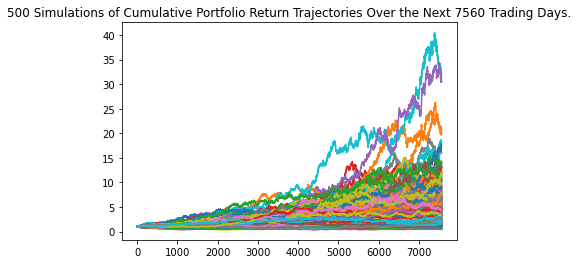

In [46]:
# Plot simulation outcomes
MC_Y30.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

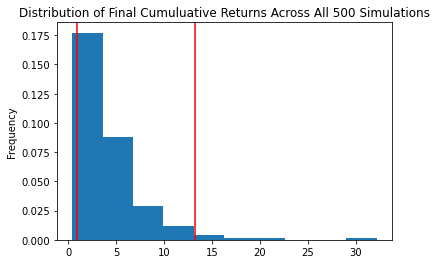

In [47]:
# Plot probability distribution and confidence intervals
MC_Y30.plot_distribution()

### Retirement Analysis

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_Y30_stats = MC_Y30.summarize_cumulative_return()

In [49]:
# Print summary statistics
print(MC_Y30_stats)

count           500.000000
mean              4.241167
std               3.596818
min               0.425456
25%               1.970915
50%               3.243721
75%               5.183897
max              32.146532
95% CI Lower      0.919565
95% CI Upper     13.182260
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [50]:
# Set initial investment
initial_investment = 20000

In [51]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_Y30_stats[8] * initial_investment, 2)
ci_upper = round(MC_Y30_stats[9] * initial_investment, 2)

In [52]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $18,391.31 and $263,645.19


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [53]:
# Set initial investment
initial_investment = 20000 * 1.5

In [54]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_Y30_stats[8] * initial_investment, 2)
ci_upper = round(MC_Y30_stats[9] * initial_investment, 2)

In [55]:
## Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $27,586.96 and $395,467.79


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [56]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Y05 = MCSimulation(portfolio_data = df_stock_data,
                      weights = [0.10, 0.90],
                      num_simulation = 500 ,
                      num_trading_days = 252*5
                      )

In [57]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Y05.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


C:\Users\twigi\FTBC\W5_Assignment\APIs-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.008740  0.997904  1.004637  0.994585  0.997765  1.015745  1.004374   
2     1.037663  0.987384  1.014528  0.992046  0.990950  1.018173  1.007545   
3     1.038023  0.964702  1.016231  0.992790  1.007417  1.020748  1.001475   
4     1.051415  0.959282  1.025761  1.007063  1.010972  0.996291  0.993707   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.746690  1.251758  1.049157  0.689464  3.539050  0.583364  1.347077   
1257  1.728129  1.262233  1.058906  0.698848  3.544653  0.579234  1.337730   
1258  1.717512  1.256536  1.079959  0.702304  3.625420  0.585834  1.337806   
1259  1.737239  1.261014  1.086984  0.698467  3.711618  0.588648  1.363012   
1260  1.755745  1.278480  1.101834  0.700543  3.674791  0.583216  1.364890   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.010791  1.001266  0.994148  ...  1.003306  0.980923  1.000995   
2     0.994426  0.995629  0.976333  ...  0.988672  0.990264  1.002888   
3     1.021472  0.993885  0.987654  ...  0.991326  1.005058  1.023403   
4     1.019464  0.983031  0.998044  ...  0.972100  1.008714  1.029618   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.976744  0.892741  1.638601  ...  1.125915  1.224503  0.752975   
1257  1.976477  0.867943  1.630308  ...  1.131103  1.236607  0.744572   
1258  1.990970  0.861458  1.601860  ...  1.142532  1.220709  0.743763   
1259  2.000213  0.867682  1.600407  ...  1.153397  1.207521  0.736169   
1260  1.996335  0.866209  1.580856  ...  1.137385  1.193432  0.732623   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.989425  0.997396  0.990402  1.006298  0.987401  1.011590  0.994920  
2     1.007632  1.002172  0.996003  1.022357  1.007062  1.011006  1.011151  
3     0.992546  0.997379  1.007156  1.019473  1.015430  1.028018  1.005783  
4     1.001974  0.994109  0.977498  1.030483  1.014411  1.041935  0.990649  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.632458  1.143557  1.433410  1.150290  1.895786  1.019203  1.079357  
1257  1.598332  1.155202  1.451805  1.158186  1.903308  1.028584  1.088799  
1258  1.589579  1.128334  1.452322  1.175137  1.881154  1.032611  1.110121  
1259  1.563737  1.133630  1.434649  1.164033  1.890049  1.044904  1.096353  
1260  1.553514  1.126333  1.440838  1.188168  1.849349  1.039128  1.095089  

[1261 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

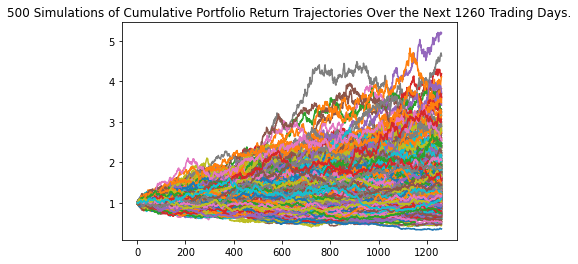

In [58]:
# Plot simulation outcomes
MC_Y05.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

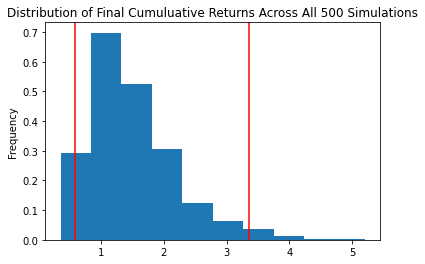

In [59]:
# Plot probability distribution and confidence intervals
MC_Y05.plot_distribution()

In [60]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_Y05_stats = MC_Y05.summarize_cumulative_return()

In [61]:
# Print summary statistics
print(MC_Y05_stats)

count           500.000000
mean              1.508310
std               0.708321
min               0.356146
25%               1.011428
50%               1.347218
75%               1.839797
max               5.201728
95% CI Lower      0.593917
95% CI Upper      3.362128
Name: 1260, dtype: float64


In [62]:
# Set initial investment
initial_investment = 20000*10

In [63]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $200,000
ci_lower_five = round(MC_Y05_stats[8] * initial_investment, 2)
ci_upper_five = round(MC_Y05_stats[9] * initial_investment, 2)

In [64]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,.2f} and ${ci_upper_five:,.2f}")

There is a 95% chance that an initial investment of $200,000.00 in the portfolio over the next 5 years will end within in the range of $118,783.38 and $672,425.57


### Ten Years Retirement Option

In [65]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Y10 = MCSimulation(portfolio_data = df_stock_data,
                      weights = [0.30, 0.70],
                      num_simulation = 500 ,
                      num_trading_days = 252*10
                      )

In [66]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Y10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\twigi\FTBC\W5_Assignment\APIs-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.992311  1.000843  0.998088  1.012509  0.999804  1.000969  1.004330   
2     1.009553  0.986330  1.000377  1.005212  1.021524  0.973848  1.021216   
3     1.008966  1.007366  0.999213  1.005113  1.020618  0.987901  1.017684   
4     0.990174  1.005586  1.017272  1.007731  1.030030  0.985831  1.019955   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.239193  1.996916  2.066345  0.696698  1.279600  1.047251  1.185732   
2517  2.265595  2.004087  2.042733  0.699426  1.282359  1.060295  1.185786   
2518  2.280267  1.996927  2.013914  0.700078  1.277507  1.057090  1.168645   
2519  2.269153  2.002278  2.025542  0.693205  1.294343  1.047682  1.151994   
2520  2.268129  2.005398  2.000590  0.694602  1.308256  1.037539  1.150347   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.006713  1.003284  0.995264  ...  1.013552  1.006163  0.994724   
2     1.010046  0.998664  0.987993  ...  1.014038  1.009419  0.996325   
3     0.990700  0.995675  0.991115  ...  0.999162  1.006164  0.974766   
4     0.990346  1.004056  0.981237  ...  0.999624  0.988906  0.977878   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.001591  1.997120  2.248721  ...  1.157920  2.265324  2.527740   
2517  1.013740  2.003916  2.264094  ...  1.166403  2.247663  2.498992   
2518  1.012790  1.993784  2.296719  ...  1.154522  2.240979  2.522376   
2519  1.015492  2.006223  2.298232  ...  1.123663  2.221376  2.507933   
2520  1.000029  2.009203  2.284967  ...  1.125405  2.223549  2.504698   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.989135  1.000268  1.002633  0.977708  1.002043  1.012019  0.989399  
2     0.996300  0.993990  0.996302  0.987415  0.999313  1.008486  0.985804  
3     0.994256  0.994462  0.996940  0.997006  0.976631  1.022054  0.978993  
4     0.986729  1.004623  1.001849  0.992182  0.992979  1.032742  0.980561  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.945064  1.046202  2.206538  1.510660  0.667353  1.020515  2.555118  
2517  1.963974  1.043995  2.180367  1.530341  0.664443  1.031143  2.545327  
2518  1.898322  1.050581  2.158311  1.542624  0.658932  1.039771  2.540593  
2519  1.888785  1.030118  2.118379  1.563210  0.656153  1.048250  2.534927  
2520  1.833973  1.030565  2.125073  1.562769  0.650140  1.044117  2.532707  

[2521 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

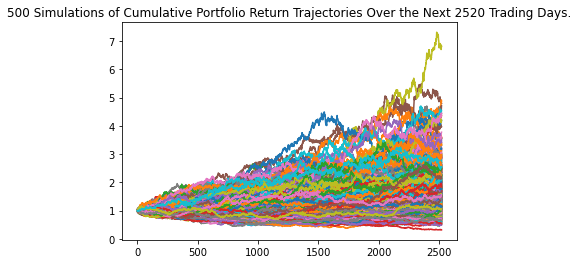

In [67]:
# Plot simulation outcomes
MC_Y10.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

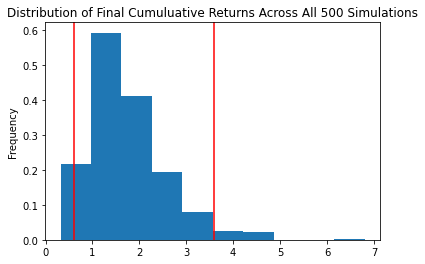

In [68]:
# Plot probability distribution and confidence intervals
MC_Y10.plot_distribution()

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_Y10_stats = MC_Y10.summarize_cumulative_return()

In [70]:
# Print summary statistics
print(MC_Y10_stats)

count           500.000000
mean              1.739213
std               0.825391
min               0.318428
25%               1.141471
50%               1.573800
75%               2.163151
max               6.805732
95% CI Lower      0.614095
95% CI Upper      3.589645
Name: 2520, dtype: float64


In [71]:
# Set initial investment
initial_investment = 20000*7

In [72]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $140,000
ci_lower_ten = round(MC_Y10_stats[8] * initial_investment, 2)
ci_upper_ten = round(MC_Y10_stats[9] * initial_investment, 2)

In [73]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,.2f} and ${ci_upper_ten:,.2f}")

There is a 95% chance that an initial investment of $140,000.00 in the portfolio over the next 10 years will end within in the range of $85,973.27 and $502,550.25


#### Notes:
Assuming one would like to maintain a similar lifestyle regardless when one retires,<br>
a) retiring in 5 years instead of 30 years time <br>
The initial investment amount will need to increase significantly. The above numerical illustration has used an increase of 10 times (or 1000%) in initial investment. <br>
The significant increase is to compensate the shorter wealth accumulation period. The investment portfolio was adjusted to include more risk (90% stock and 10% bonds) to boost the expected portfolio return. <br>

b) retiring in 10 years instead of 30 years time <br>
Similarly, the initial invsetment amount will need to increase signficantly and could be less than the amount as if one would want to retire in 5 years time. The above numerical illustration has used an increase of 7 times (or 700%) in initial investment. The investment portfolio was adjusted to include more risk (80% stock and 20% bonds) to boost the expected portfolio return.